In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/home/noname/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).


In [9]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
df = pd.read_csv("car_fuel_efficiency.csv")

--2025-10-09 00:10:30--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853,70K  2,62MB/s    in 0,3s    

2025-10-09 00:10:30 (2,62 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



In [10]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`


In [11]:
df_final = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [12]:
df_final.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

<Axes: >

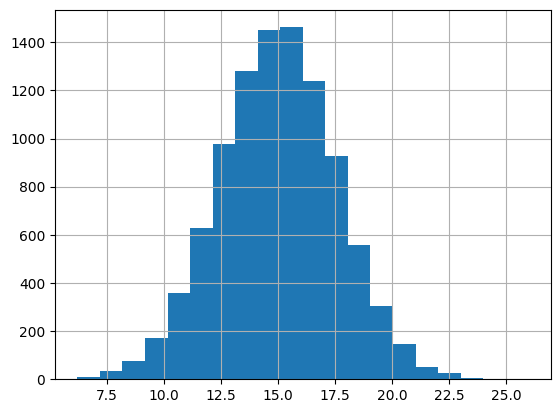

In [13]:
df_final['fuel_efficiency_mpg'].hist(bins=20)

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'` ✅
* `'vehicle_weight'`
* `'model_year'`

In [14]:
df_final.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149 ✅
- 199

In [15]:
df_final.horsepower.median()

149.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


In [16]:
X_sub_random = df_final.sample(frac=1.0, random_state=42)

In [17]:
y_sub_random = X_sub_random['fuel_efficiency_mpg']
X_sub_random = X_sub_random.drop(columns='fuel_efficiency_mpg')

In [18]:
n = len(X_sub_random)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

n, n_val + n_train + n_test

(9704, 9704)

In [19]:
X_train = X_sub_random[:n_train]
y_train = y_sub_random[:n_train]

X_val_sub_ran = X_sub_random[n_train:n_train + n_val]
y_val = y_sub_random[n_train:n_train + n_val]

X_test_sub_ran = X_sub_random[n_train + n_val:]
y_test = y_sub_random[n_train + n_val:]

In [20]:
X_test_sub_ran

,engine_displacement,horsepower,vehicle_weight,model_year
3729,140,148.0,2704.826005,2017
7764,210,136.0,3001.227490,2004
4358,210,152.0,3747.467392,2021
5922,190,128.0,2705.833636,2014
1343,230,156.0,2505.939657,2005
...,...,...,...,...
5734,210,163.0,1972.029124,2011
5191,160,126.0,3011.588014,2009
5390,290,187.0,2440.508039,2019
860,260,129.0,1865.404480,2019


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?


Options:

- With 0
- With mean ✅
- Both are equally good

In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [22]:
def rmse(y, y_pred, decimals=2):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.round(np.sqrt(mse), decimals)

##### Option 1. Fill with zeros

In [23]:
w0_zero, w_zero = train_linear_regression(X_train.fillna(0), y_train)
w0_zero, w_zero

(28.82736547365895,
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

In [24]:
y_pred_zero = w0_zero + X_train.dot(w_zero)
y_pred_zero 

483     17.335262
7506    16.292963
8795    17.698851
1688    11.472499
6217    19.231459
          ...    
1696    16.965155
5685     9.939299
6735    17.545413
2052    18.782875
1776    17.865648
Length: 5824, dtype: float64

In [25]:
rmse(y_train, y_pred_zero)

0.5

##### Option 2. Fill with mean

In [27]:
w0_mean, w_mean = train_linear_regression(X_train.fillna(X_train.horsepower.mean()), y_train)
w0_mean, w_mean

(28.925259951002698,
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [28]:
y_pred_mean = w0_mean + X_train.dot(w_mean)
y_pred_mean 

483     17.259110
7506    16.190113
8795    17.692459
1688    11.814410
6217    18.934381
          ...    
1696    16.856287
5685     9.785104
6735    17.516664
2052    18.778124
1776    17.845934
Length: 5824, dtype: float64

In [29]:
rmse(y_train, y_pred_mean)

0.45

<Axes: ylabel='Count'>

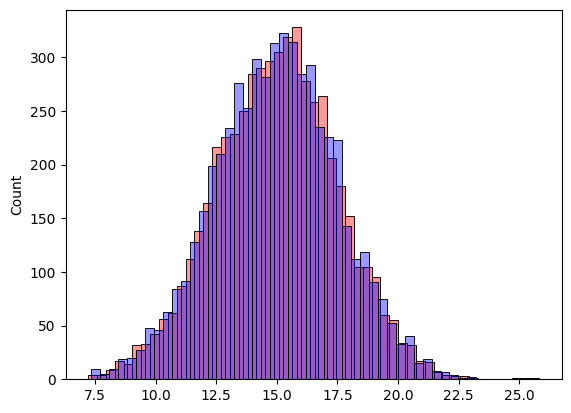

In [30]:
sns.histplot(y_pred_zero, color='red', alpha=0.4, bins=50)
sns.histplot(y_pred_mean, color='blue', alpha=0.4, bins=50)

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0 ✅
- 0.01
- 1
- 10
- 100

In [31]:
def train_linear_regression_reg(X, y, reg=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + reg * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [32]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0_zero_reg, w_zero_reg = train_linear_regression_reg(X_train.fillna(0), y_train, reg=r)
    y_pred_reg_val = w0_zero_reg + X_val_sub_ran.dot(w_zero_reg)
    rsme_val_reg = rmse(y_val, y_pred_reg_val)
    print("For a reg of {} the rsme score el validation is {}".format(r, rsme_val_reg))

    

For a reg of 0 the rsme score el validation is 0.5
For a reg of 0.01 the rsme score el validation is 0.5
For a reg of 0.1 the rsme score el validation is 0.5
For a reg of 1 the rsme score el validation is 0.5
For a reg of 5 the rsme score el validation is 0.5
For a reg of 10 the rsme score el validation is 0.5
For a reg of 100 the rsme score el validation is 0.5


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006 ✅
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [33]:
rmses = []

for seed in range(10):
    df_sub_random = df_final.sample(frac=1.0, random_state=seed)

    y_sub_random = df_sub_random['fuel_efficiency_mpg']
    X_sub_random = df_sub_random.drop(columns='fuel_efficiency_mpg')

    X_train = X_sub_random[:n_train]
    y_train = y_sub_random[:n_train]

    X_val_sub_ran = X_sub_random[n_train:n_train + n_val]
    y_val = y_sub_random[n_train:n_train + n_val]

    X_test_sub_ran = X_sub_random[n_train + n_val:]
    y_test = y_sub_random[n_train + n_val:]


    w0_zero, w_zero = train_linear_regression(X_train.fillna(0), y_train)
    y_pred_val = w0_zero + X_val_sub_ran.dot(w_zero)
    rmses.append(rmse(y_val, y_pred_val, decimals=10))

print("The standard deviation of RMSEs is {}".format(round(np.std(rmses), 3)))
    
    

The standard deviation of RMSEs is 0.006


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515 ✅
- 5.15
- 51.5

In [34]:

df_sub_random = df_final.sample(frac=1.0, random_state=9)

y_sub_random = df_sub_random['fuel_efficiency_mpg']
X_sub_random = df_sub_random.drop(columns='fuel_efficiency_mpg')

# combine the train + val
X_train = X_sub_random[:n_train + n_val]
y_train = y_sub_random[:n_train + n_val]

X_test_sub_ran = X_sub_random[n_train + n_val:]
y_test = y_sub_random[n_train + n_val:]


w0_zero, w_zero = train_linear_regression_reg(X_train.fillna(0), y_train, reg=0.001)
y_pred_test = w0_zero + X_test_sub_ran.dot(w_zero)

print("The RMSE on test dataset is {}".format(rmse(y_test, y_pred_test, decimals=2)))
    
    

The RMSE on test dataset is 0.5
